# Setup

In [2]:
import numpy as np
import matplotlib.pylab as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.colorbar as colorbar

from scipy.stats import norm


# Plotter

## Function

In [3]:
def PolarPlotmaker(probabilities, labels=None, figsize = (5,5), dpi = 120, background = None, debug = False, tick_color = 'limegreen', linelength = 10, pad = 15, save_name = None):
    labels_type = 'string'
    N = len(probabilities)
    angles = np.linspace(0,2*np.pi-2*np.pi/N,N)
    
    angles = np.concatenate((angles,[angles[0]]))
    probabilities = np.concatenate((probabilities,[probabilities[0]]))

    if debug:
        print(f'Angles (length {len(angles)}): {np.round(angles,4)}')
        print(f'Probabilies (length {len(probabilities)}): {np.round(probabilities,4)}')

    
    if labels is not None:
        if len(labels)!=N:
            labels = np.arange(0,N)
            labels_type = 'int'
        

    if labels is None:
        labels = np.arange(0,N)
        labels_type = 'int'


    if labels_type == 'string':
        labels_modified = []
        for label in labels:
            new_label = ""
            lines = 1
            first_step = True
            for i, letter in enumerate(label):
                if lines == 3:
                    new_label = new_label[:-3]
                    new_label += '...'
                    break
                if i % linelength == 0 and not first_step:
                    lines+=1
                    if new_label[-1] != ' ':
                        new_label +='-'
                    new_label += '\n'
                new_label += letter
                first_step = False
            if new_label[:2] == "A " or new_label[:2] == "a ":
                new_label=new_label[2:]
            labels_modified.append(new_label)


            

    plt.figure(figsize=figsize, dpi = dpi)
    
    ax = plt.subplot(111, polar=True)

    z = angles
    normalize = colors.Normalize(vmin=z.min(), vmax=z.max())

    cmap = colors.LinearSegmentedColormap.from_list("", ["aqua","mediumslateblue","orchid",'magenta', 'mediumorchid', 'mediumpurple','dodgerblue']*2)

    ax.plot(angles, probabilities, linewidth=1, linestyle='solid')
    
    # Fill area
    #ax.fill(angles, values, 'b', alpha=0.1)

    ax.set_yticklabels([])
    ax.get_yaxis().set_ticks([])

    for i in range(len(probabilities)-1):
        ax.fill_between([angles[i], angles[i+1]], [probabilities[i], probabilities[i+1]], color=cmap(normalize(z[i])))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_modified, color = tick_color)
    ax.xaxis.set_tick_params(grid_linewidth = 1, grid_color = tick_color, pad = pad)
    
    ax.spines['polar'].set_color(tick_color)
    
    ax.set_ylim(0,max(probabilities))

    ax.set_facecolor(background)


    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Show the graph
    plt.tight_layout()
    
    if type(save_name)==str:
        plt.savefig(save_name, transparent = True)
    plt.show()
    

## Tests

In [20]:
N = 12
angles = np.linspace(0,2*np.pi-2*np.pi/N,N-1)
values = np.random.random(len(angles))
values = values/np.sum(values)

labels = ["A rooftop bar",
    "A comedy club",
    "A concert venue",
    "A music festival",
    "A street fair",
    "A bowling alley",
    "A casino",
    "A sports stadium",
    "A karaoke bar",
    "A restaurant with live music",
    "A rooftop terrace"]

Angles (length 12): [0.     0.5712 1.1424 1.7136 2.2848 2.856  3.4272 3.9984 4.5696 5.1408
 5.712  0.    ]
Probabilies (length 12): [0.1206 0.031  0.1548 0.0775 0.1454 0.0047 0.0669 0.1188 0.1466 0.0577
 0.0761 0.1206]


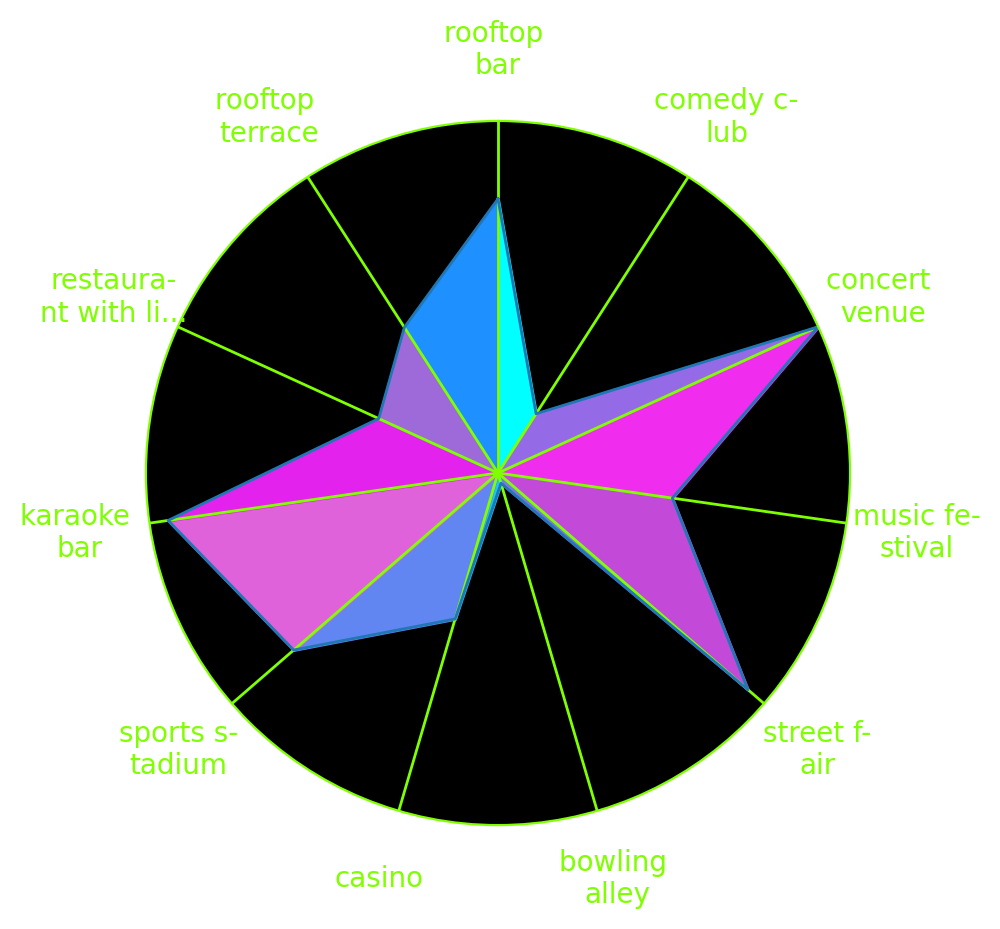

In [22]:
PolarPlotmaker(values, labels = labels,debug = True, background='black', tick_color='chartreuse', save_name='test.png', dpi = 200)

In [311]:
test = '1234567'
test[2:]

'34567'